# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

- the data analyzes two merged data sets with information regarding different drug regimen testing on mice.
- Gender Distribution: The pie chart analysis of gender distribution shows a relatively balanced representation of male and female mice in the study. This suggests that gender bias is less likely to influence the treatment outcomes observed.
- Treatment Efficacy: The box plot analysis suggests that Capomulin and Ramicane exhibit lower median tumor volumes compared to Infubinol and Ceftamin.
- Potential Outliers: The analysis of potential outliers in the treatment groups highlights a single outlier in the Infubinol group
  

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "/Users/lauren-ashleyrutland/Downloads/Starter_Code 12/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/lauren-ashleyrutland/Downloads/Starter_Code 12/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_study = pd.merge(study_results , mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview

mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
total_mice = mouse_metadata["Mouse ID"].count()
total_mice

249

In [37]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

duplicate_mice

array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mice)==False]
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [41]:
# Checking the number of mice in the clean DataFrame.

len(clean_mouse_data['Mouse ID'].unique())

248

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

mean = mouse_study["Tumor Volume (mm3)"].groupby( mouse_study["Drug Regimen"]).mean()
median =  mouse_study["Tumor Volume (mm3)"].groupby( mouse_study["Drug Regimen"]).median()
var =  mouse_study["Tumor Volume (mm3)"].groupby( mouse_study["Drug Regimen"]).var()
std = mouse_study["Tumor Volume (mm3)"].groupby( mouse_study["Drug Regimen"]).std()
sem =  mouse_study["Tumor Volume (mm3)"].groupby( mouse_study["Drug Regimen"]).sem()


# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = pd.DataFrame({'Mean Tumor Volume': mean,
                             'Median Tumor Volume': median, 
                              'Tumor Volume Variance' : var,
                              'Tumor Volume Std Dev.' : std, 
                             'Tumor Volume Std. Err.': sem})

summary_stats   





,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = mouse_study.groupby(['Drug Regimen'])[[ 'Tumor Volume (mm3)']].agg(['mean','median', 'var', 'std' , 'sem'])
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

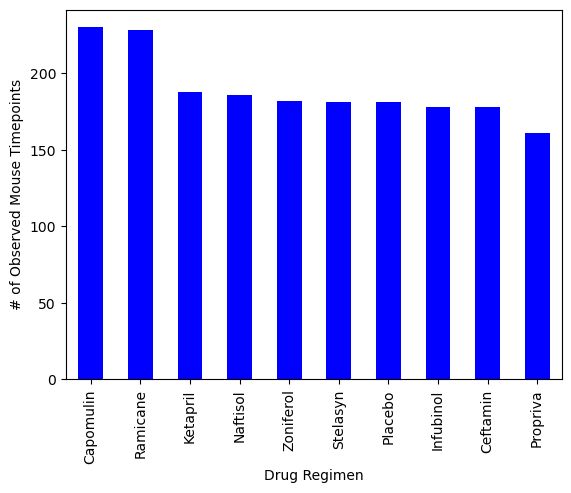

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_count = mouse_study["Drug Regimen"].value_counts()
mice_count

mouse_bar_chart = mice_count.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

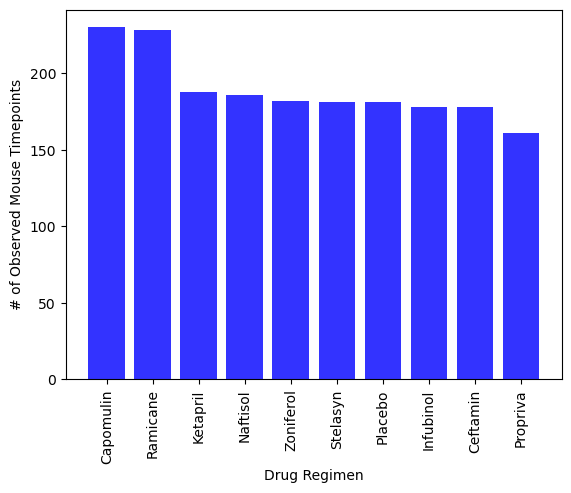

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='b', alpha = 0.8, align = 'center')


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()
        

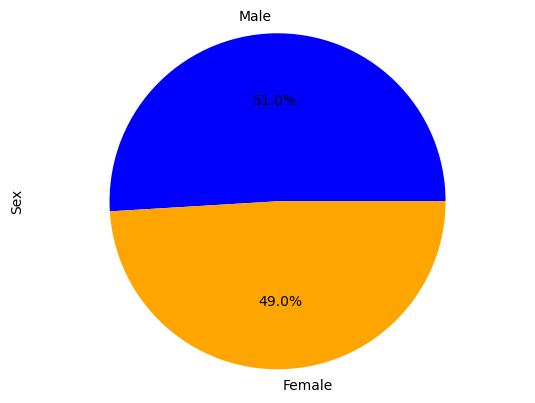

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_mouse_data['Sex'].value_counts()

# Plot the counts using a pie plot
sex_distribution.plot.pie(autopct='%1.1f%%', colors=['blue', 'orange'], startangle=360)



# Equal aspect ratio ensures that pie is drawn as a circle
plt.ylabel('Sex')
plt.axis ('equal')
# Show plot
plt.show()

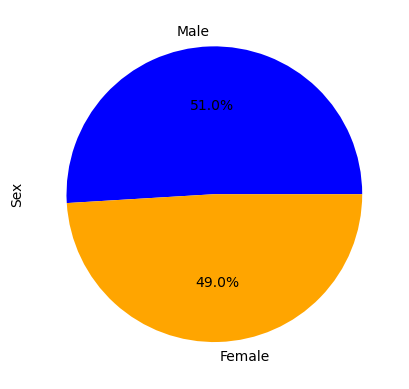

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = clean_mouse_data['Sex'].value_counts()
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=360)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_mouse_data[clean_mouse_data['Drug Regimen'].isin(selected_regimens)]
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(last_timepoints, clean_mouse_data, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volume_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [131]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Infubinol', 'Ceftamin','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#Create for loop to loop through data 

for treatment in treatments:
    treatment_data = final_tumor_volume_data[final_tumor_volume_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

 # Add the treatment_data to the tumor_vol_data list
    tumor_vol_data.append(treatment_data)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
   
    print(f"{treatment}'s potential outliers: {outliers}")

    
  


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


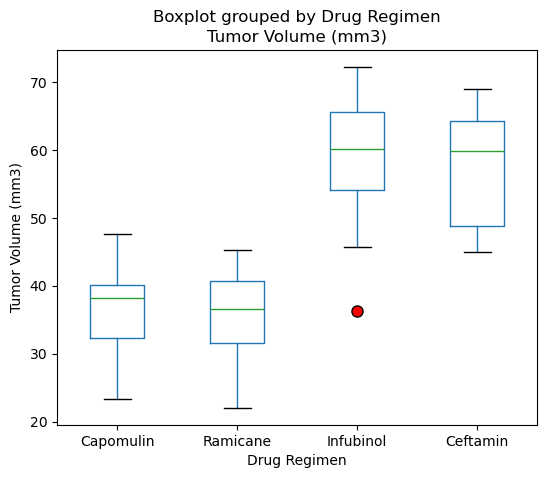

In [155]:
final_tumor_volume_data['Drug Regimen'] = pd.Categorical(final_tumor_volume_data['Drug Regimen'], 
                                                        categories=['Capomulin', 'Ramicane','Infubinol', 'Ceftamin'], 

                                                        ordered=True)

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
final_tumor_volume_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', figsize=(6, 5),grid=False,  flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

## Line and Scatter Plots

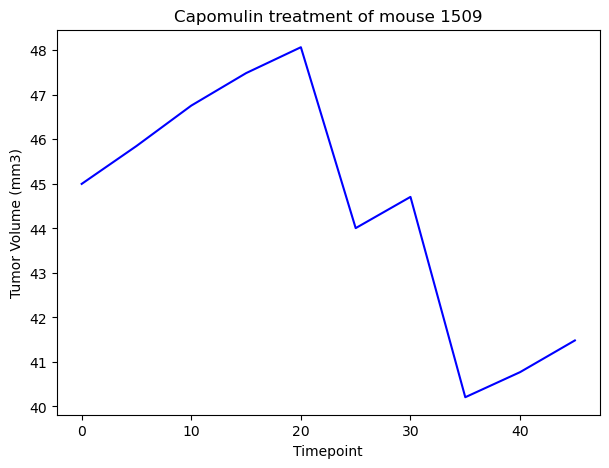

In [158]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data to include only mice treated with Capomulin
capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Choose a single mouse treated with Capomulin (you can choose any mouse ID from the filtered data)
mouse_id = 'l509'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Plot the tumor volume vs. time point for the selected mouse
plt.figure(figsize=(7,5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='b')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse 1509')

# Show plot

plt.show()

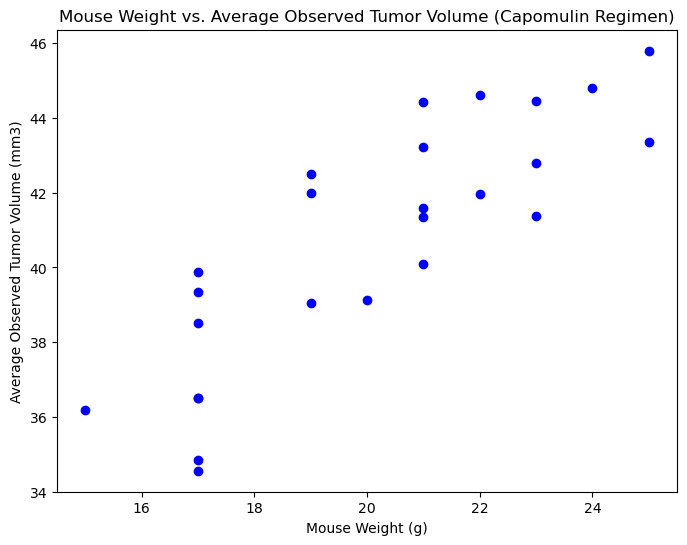

In [116]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)'], color='blue')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Observed Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Observed Tumor Volume (Capomulin Regimen)')


plt.show()

## Correlation and Regression

Correlation coefficient: 0.84


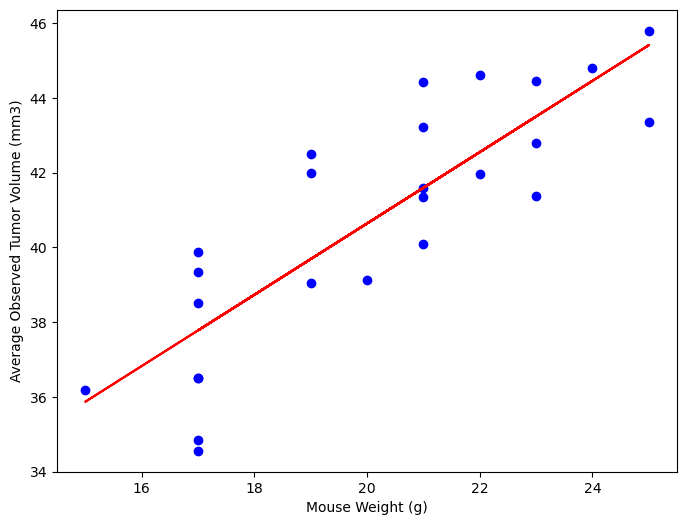

In [115]:


# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)'], color='blue')

# Plot the linear regression line
plt.plot(capomulin_summary['Weight (g)'], slope * capomulin_summary['Weight (g)'] + intercept, color='red')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Observed Tumor Volume (mm3)')

#Print the correlation coefficient
print(f'Correlation coefficient: {correlation_coefficient:.2f}')

# Show plot

plt.show()
